In [5]:
library('igraph')
graph <- read_graph(file='facebook_combined.txt',format='edgelist',directed=F)
V(graph)$name <- V(graph)

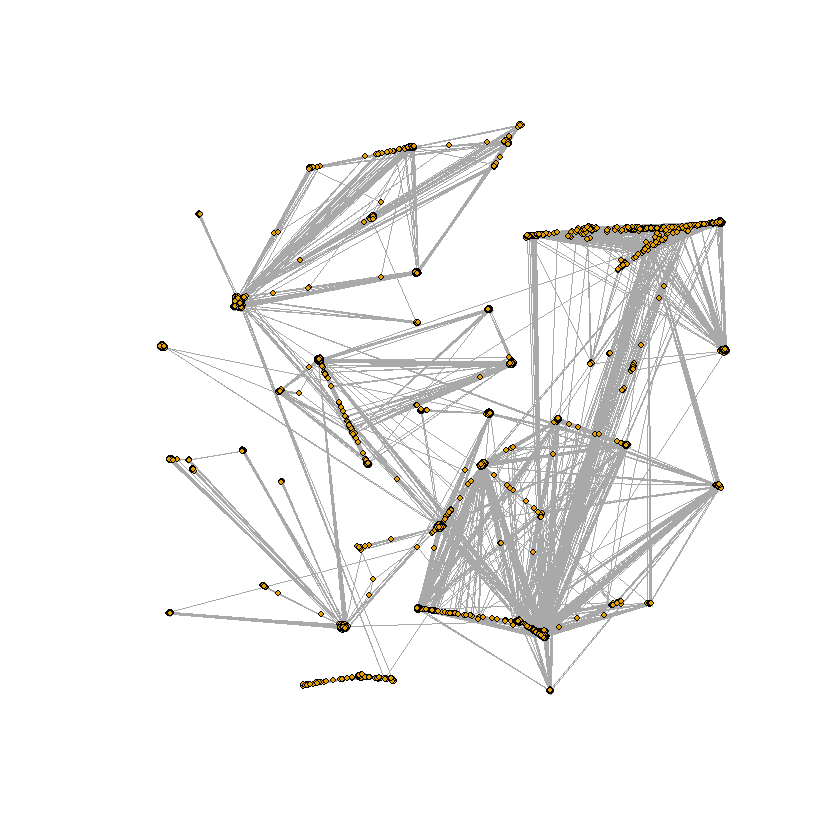

In [8]:
plot(graph,vertex.size=2, vertex.label=NA)

In [13]:
#Question 1
print('Is the graph connected?')
print(is.connected(graph))

[1] "Is the graph connected?"
[1] TRUE


In [15]:
#Question 2
print(paste('The diameter of the network is', diameter(graph)))

[1] "The diameter of the network is 8"


[1] "The average degree is 43.6910126268878"


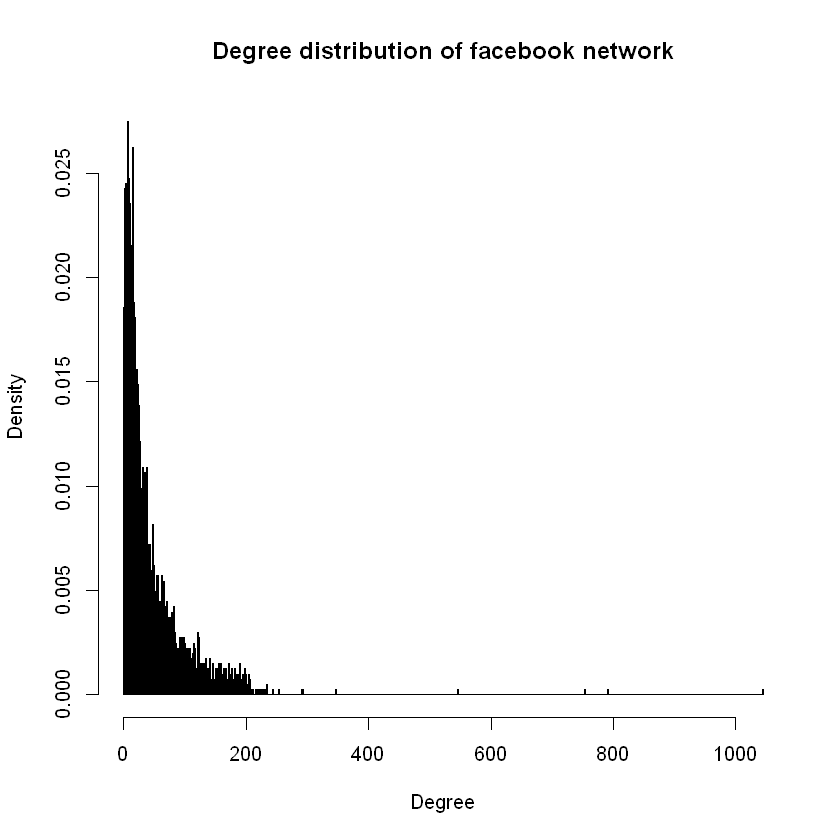

In [19]:
#Question 3
deg <- degree(graph)
hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), freq = F,
     main = 'Degree distribution of facebook network', xlab = "Degree")
print(paste('The average degree is',mean(deg)))

log_data$lind 
    -1.247526 


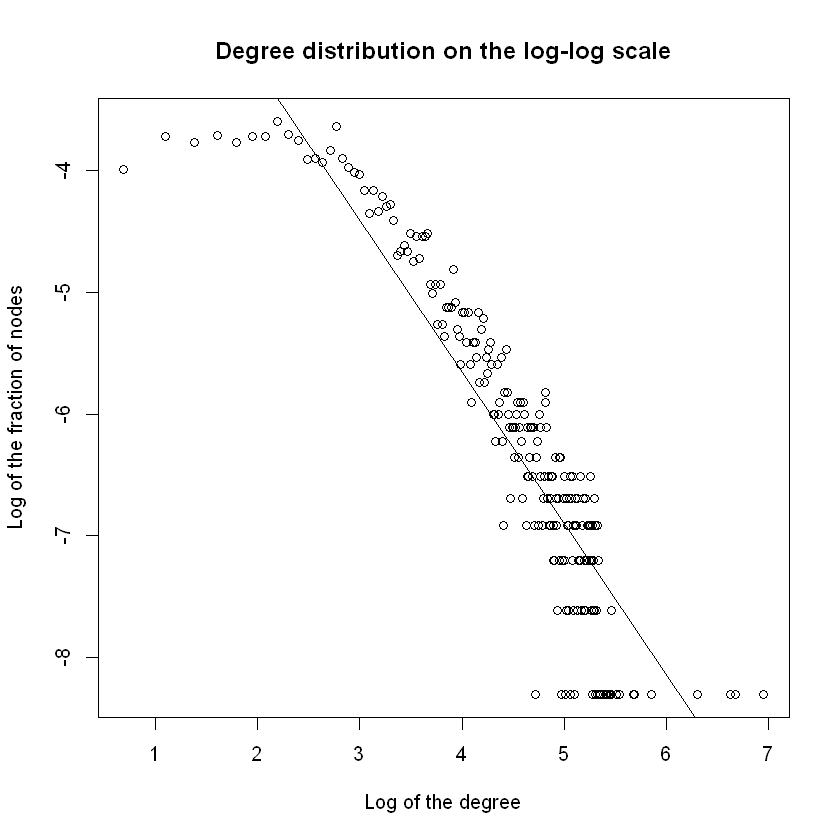

In [23]:
#Question 4
deg_dist = degree.distribution(graph)
ind = seq(length(deg_dist))
ldeg = log(deg_dist)
lind = log(ind)
log_data = data.frame(lind,ldeg)
log_data = log_data[is.finite(rowSums(log_data)),]
fit = lm(formula = log_data$ldeg ~ log_data$lind)
plot(log_data$lind,log_data$ldeg,main='Degree distribution on the log-log scale',
    xlab = 'Log of the degree',ylab='Log of the fraction of nodes')
abline(fit)
power_exp = coef(fit)[2]
print(power_exp)


[1] "The number of vertices in personalized network is 348"
[1] "The number of edges in personalized network is 2866"


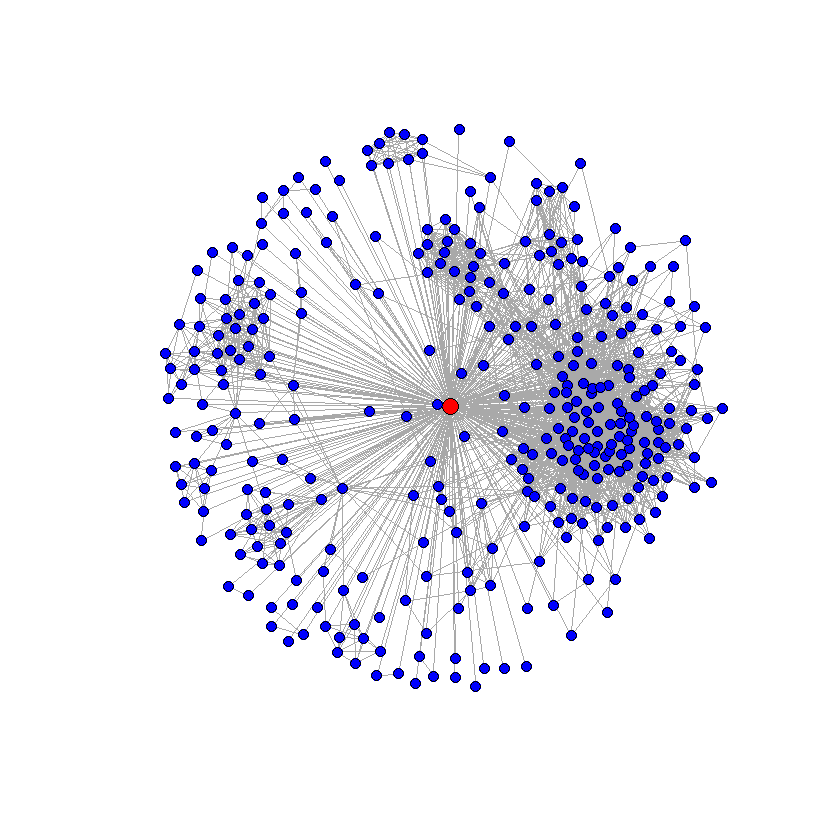

In [71]:
#Question 5
neigh = ego(graph, order=1, nodes = 1, mode = "all")
personal_net = induced_subgraph(graph, vids = unlist(neigh))
vertex_size = (V(personal_net)$name==1)*2+4
vertex_color = rep('blue',length(V(personal_net)))
vertex_color[which(V(personal_net)$name==1)]='red'
plot(personal_net,vertex.size=vertex_size,vertex.label=NA,vertex.color = vertex_color)
print(paste('The number of vertices in personalized network is', vcount(personal_net)))
print(paste('The number of edges in personalized network is', ecount(personal_net)))

In [72]:
#Question 6
print(paste('The diameter of the personalized network is',diameter(personal_net)))

[1] "The diameter of the personalized network is 2"


In [76]:
#Question 8
core_nodes=0
deg = 0
for (node in seq(vcount(graph))){
    neigh = ego_size(graph, order=1, nodes = node, mode = "all")-1
    if (neigh>200){
        core_nodes <- core_nodes + 1
        deg <- deg + neigh
    }
}
print(paste('The number of core nodes is',core_nodes))
print(paste('The average degree of core nodes is',deg/core_nodes))

[1] "The number of core nodes is 40"
[1] "The average degree of core nodes is 279.375"


In [3]:
#Question 9 
core_community = function(algo,remove_core=F){
    core_list = c(1,108,349,484,1087)
    for (i in core_list){
        node = V(graph)[V(graph)$name==i]
        neigh = ego(graph, order=1, nodes = node, mode = "all")
        vids = unlist(neigh)
        if (remove_core == T){
            vids = vids[(vids!=node)]
        }
        personal_net = induced_subgraph(graph, vids = as.character(vids))
        vertex_size = (V(personal_net)$name==i)*3+3
        edge_color = rep("gray18", length(E(personal_net)))
        if (algo=='fast_greedy'){
            comm = cluster_fast_greedy(personal_net)
        } else if (algo=='edge_betweenness'){
            comm = cluster_edge_betweenness(personal_net)
        } else {
            comm = cluster_infomap(personal_net)
        }
        writeLines(paste("The number of structures in the graph is",length(comm)))
        writeLines(paste("The modularity of the community structure is",modularity(comm)))
        if (i %in% V(personal_net)$name){
            print('Core node exists')
        }
        plot(comm,personal_net,vertex.label=NA,vertex.size=vertex_size, edge.color = edge_color, 
             layout = layout.fruchterman.reingold, asp =10/15)
    }
}

The number of structures in the graph is 8
The modularity of the community structure is 0.413101372834235
The number of structures in the graph is 9
The modularity of the community structure is 0.435929376026475


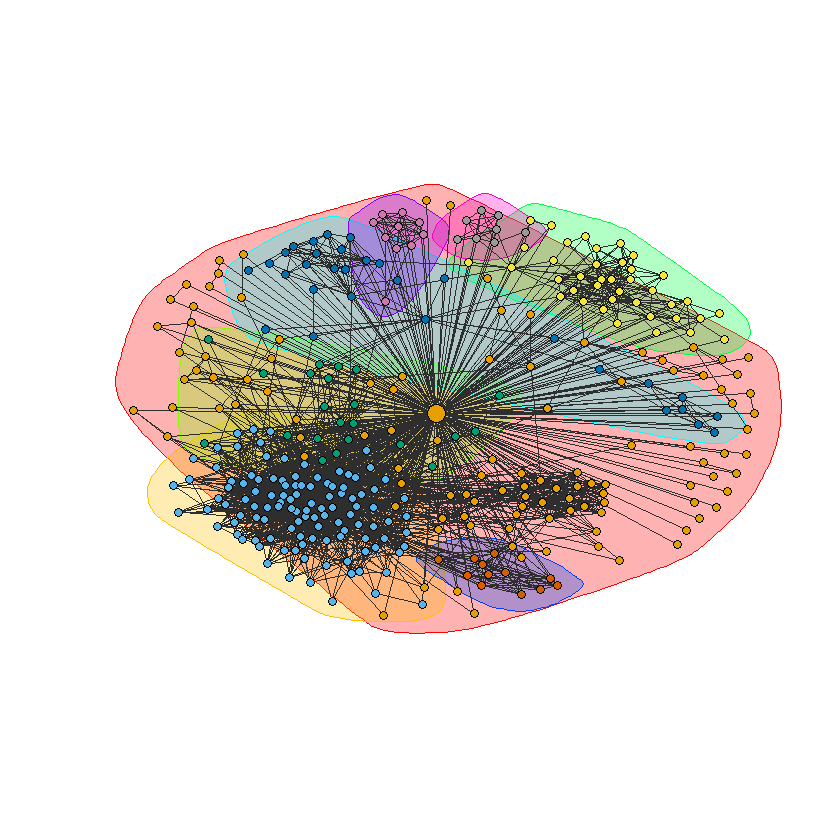

The number of structures in the graph is 5
The modularity of the community structure is 0.251714858543331


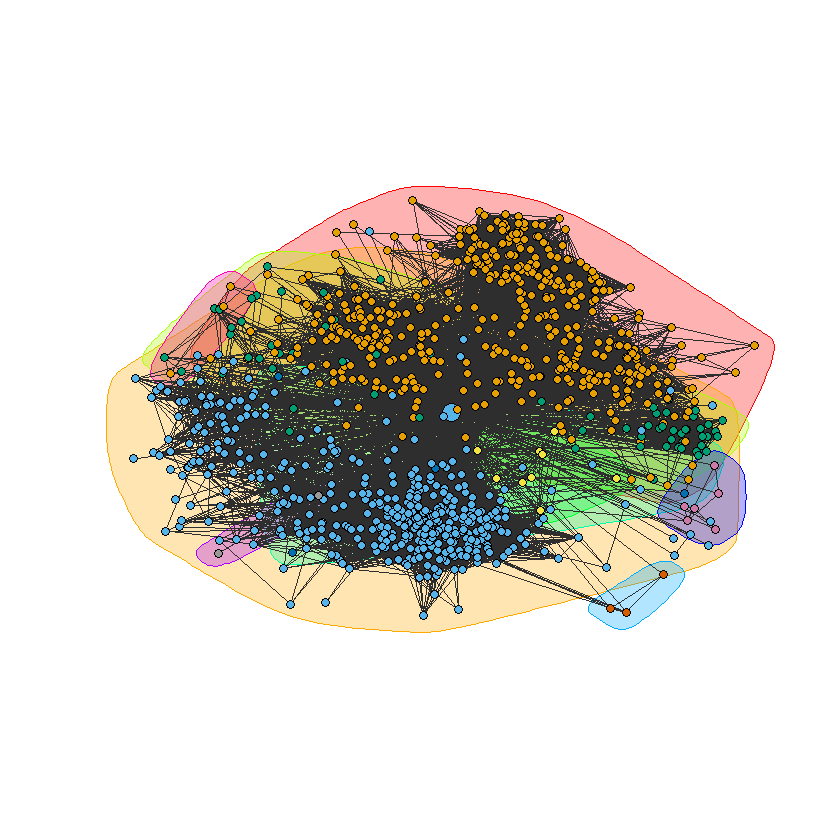

The number of structures in the graph is 3
The modularity of the community structure is 0.507001642196514


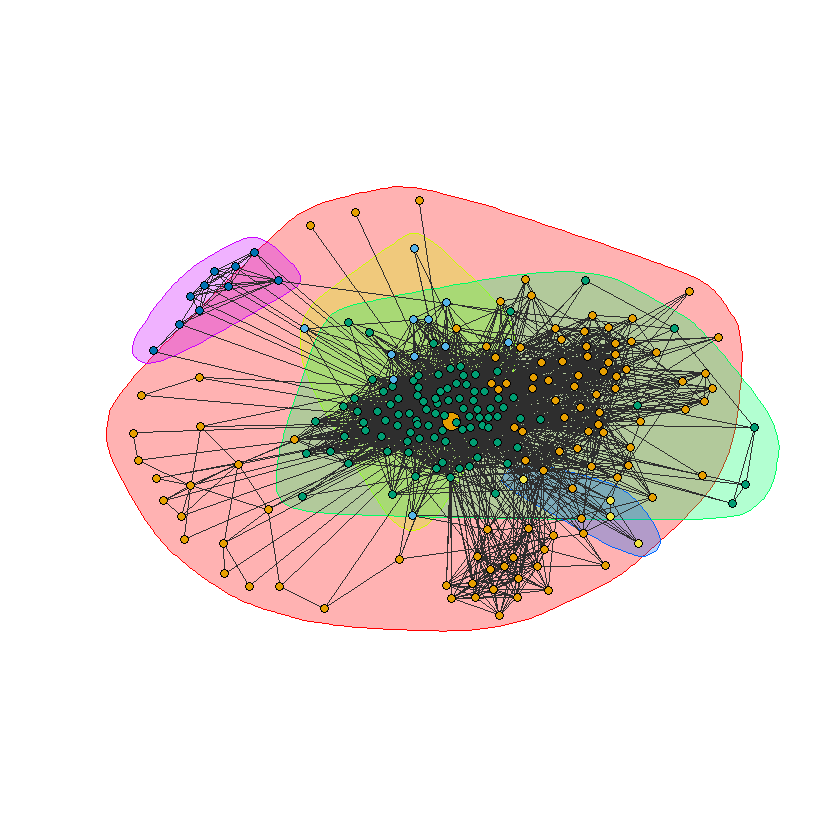

The number of structures in the graph is 2
The modularity of the community structure is 0.145531499565493


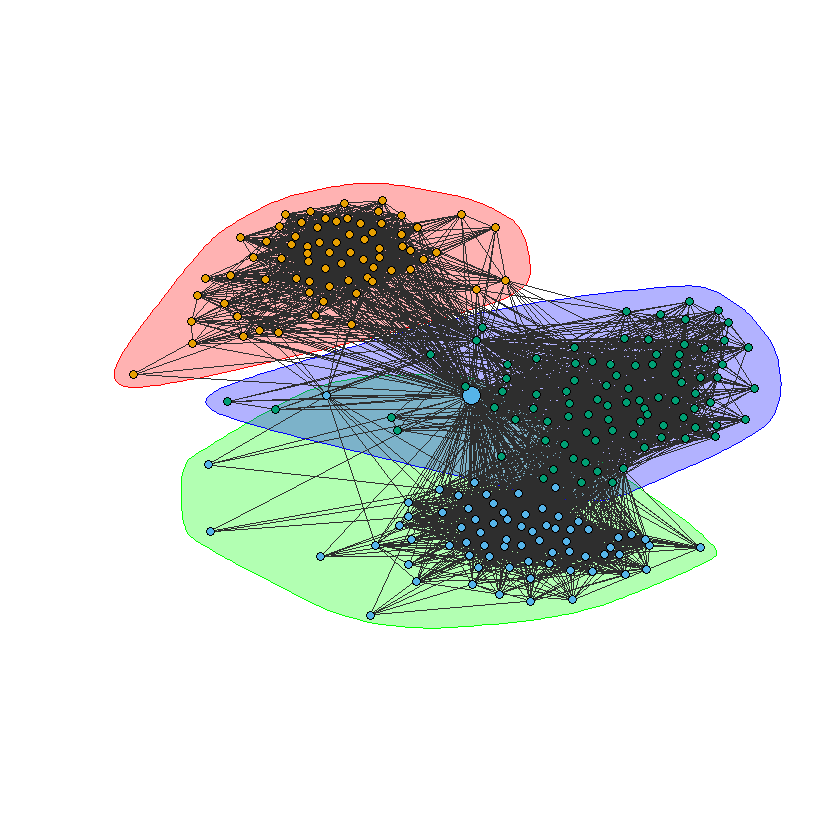

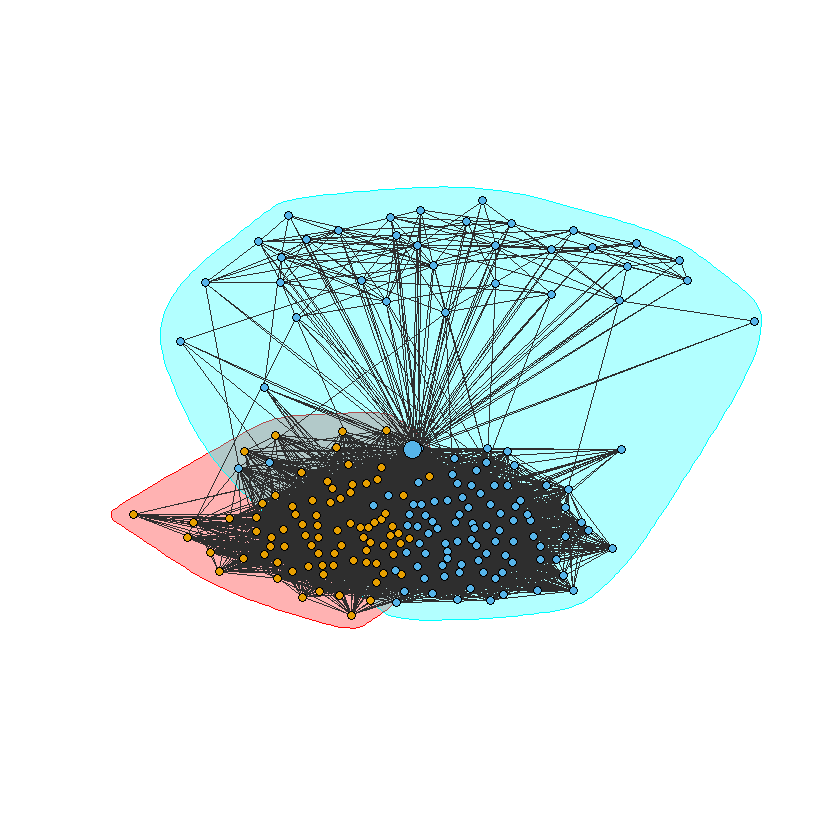

In [94]:
#Question 9 (fast_greedy)
core_community('fast_greedy')

The number of structures in the graph is 26
The modularity of the community structure is 0.389118471050977
The number of structures in the graph is 27
The modularity of the community structure is 0.508249171320581


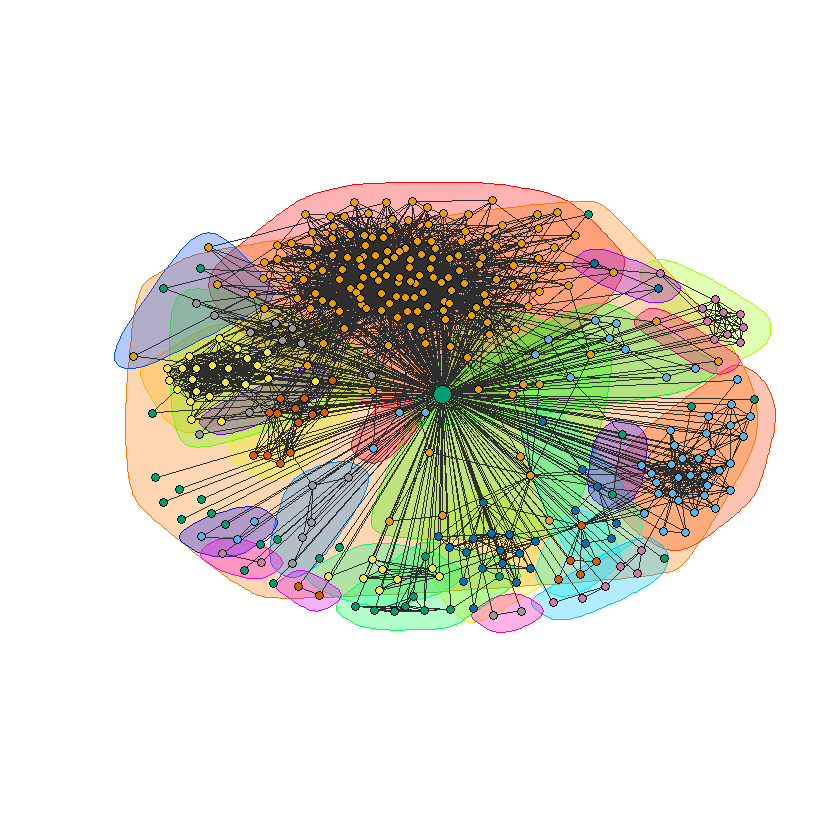

The number of structures in the graph is 10
The modularity of the community structure is 0.202447561040806


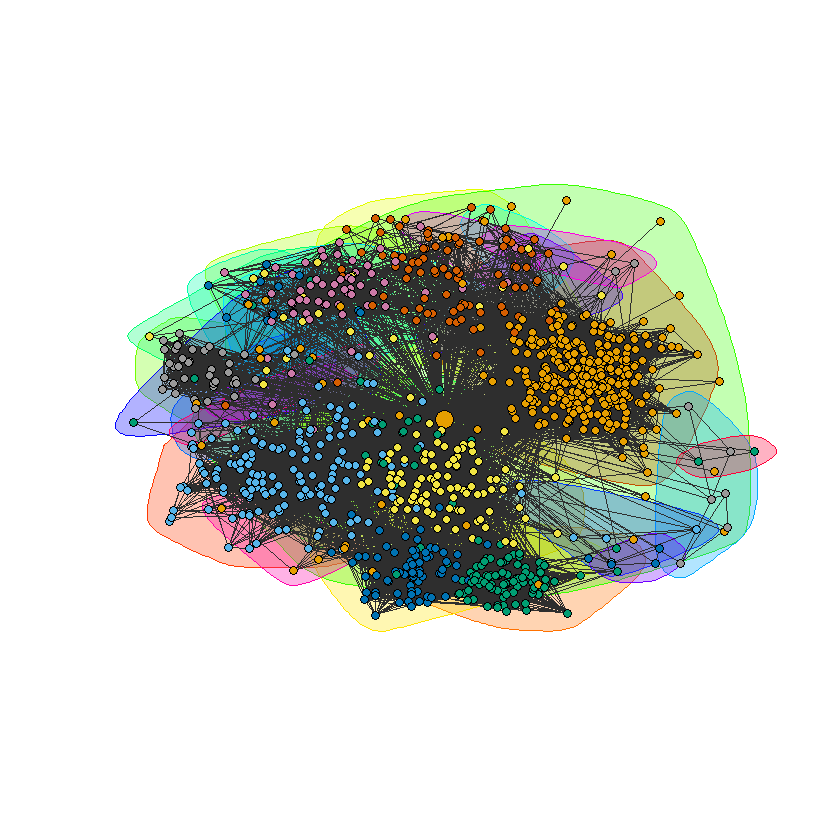

The number of structures in the graph is 4
The modularity of the community structure is 0.515278752174842


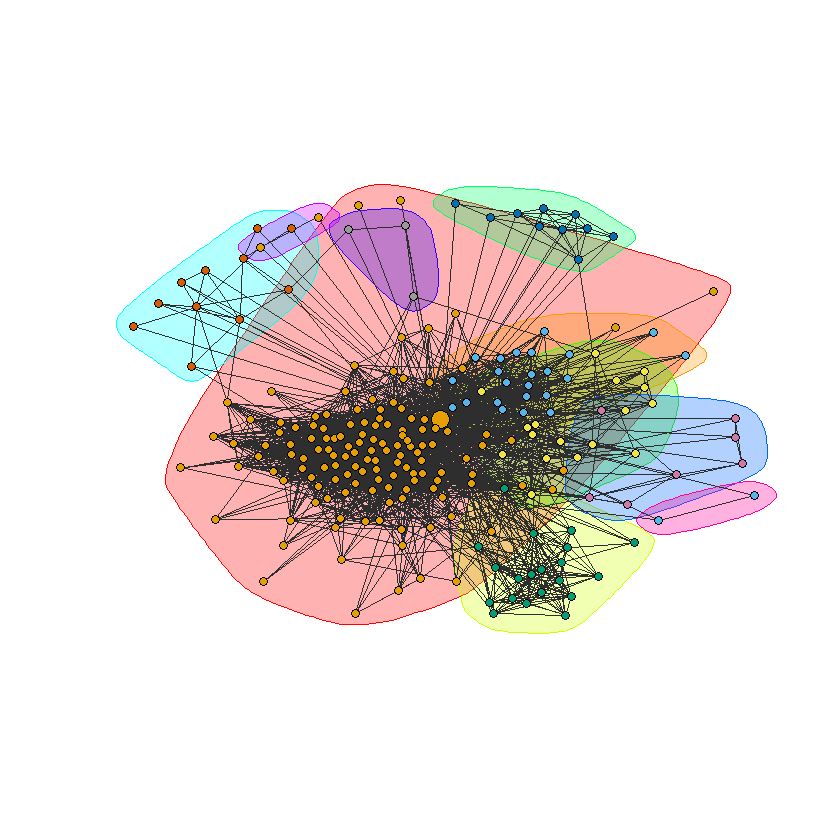

The number of structures in the graph is 4
The modularity of the community structure is 0.0269066172233357


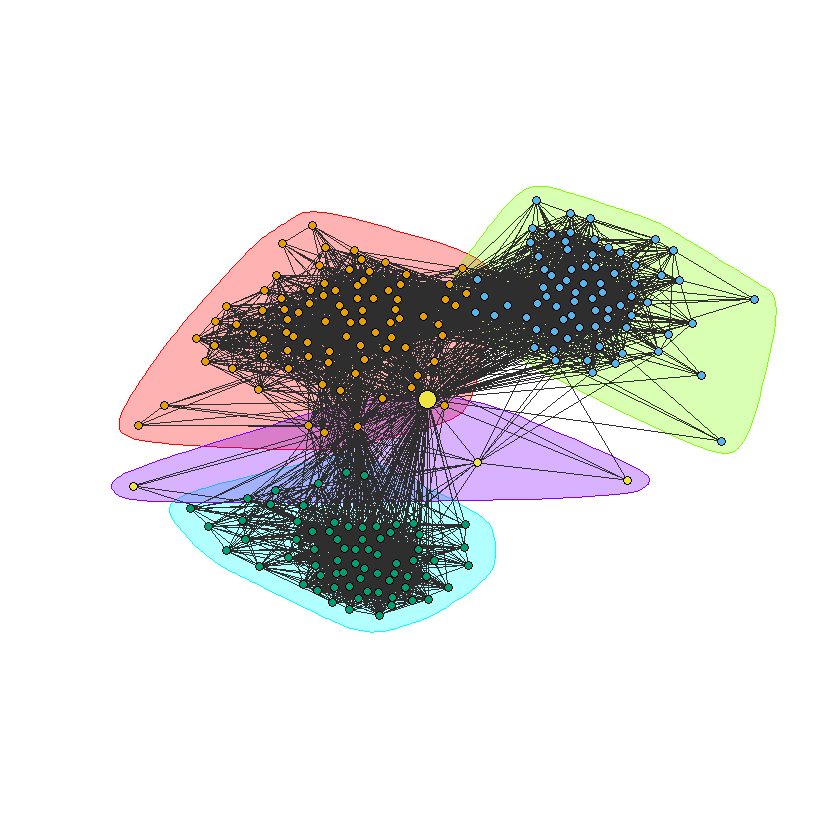

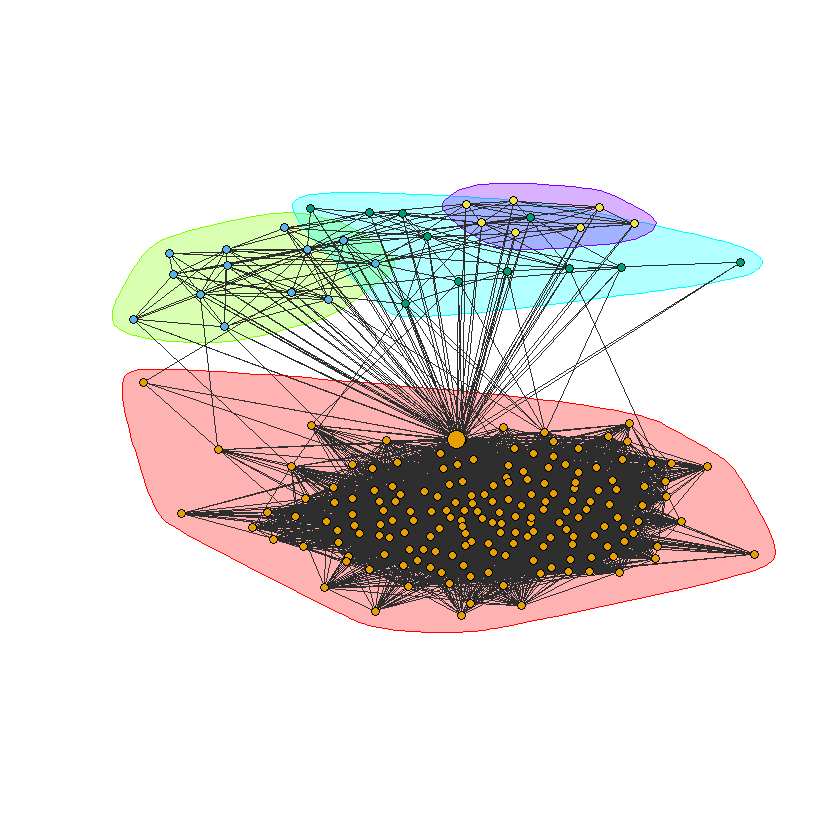

In [95]:
#Question 9 (Infomap)
core_community('infomap')

The number of structures in the graph is 41
The modularity of the community structure is 0.353302172546335
The number of structures in the graph is 52
The modularity of the community structure is 0.506754916538902


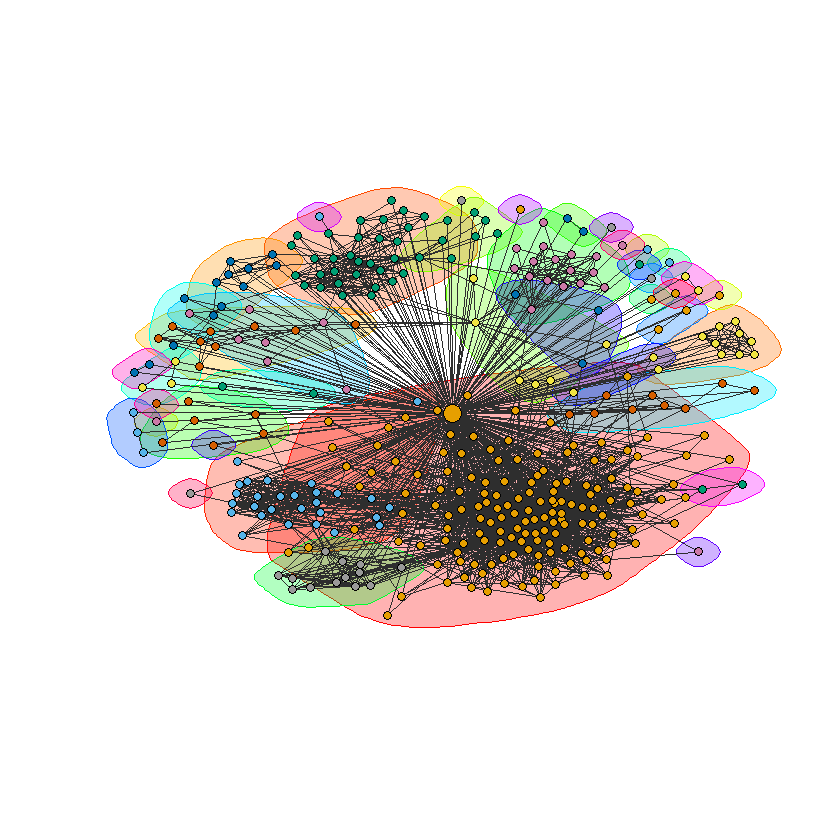

The number of structures in the graph is 104
The modularity of the community structure is 0.133528021370078


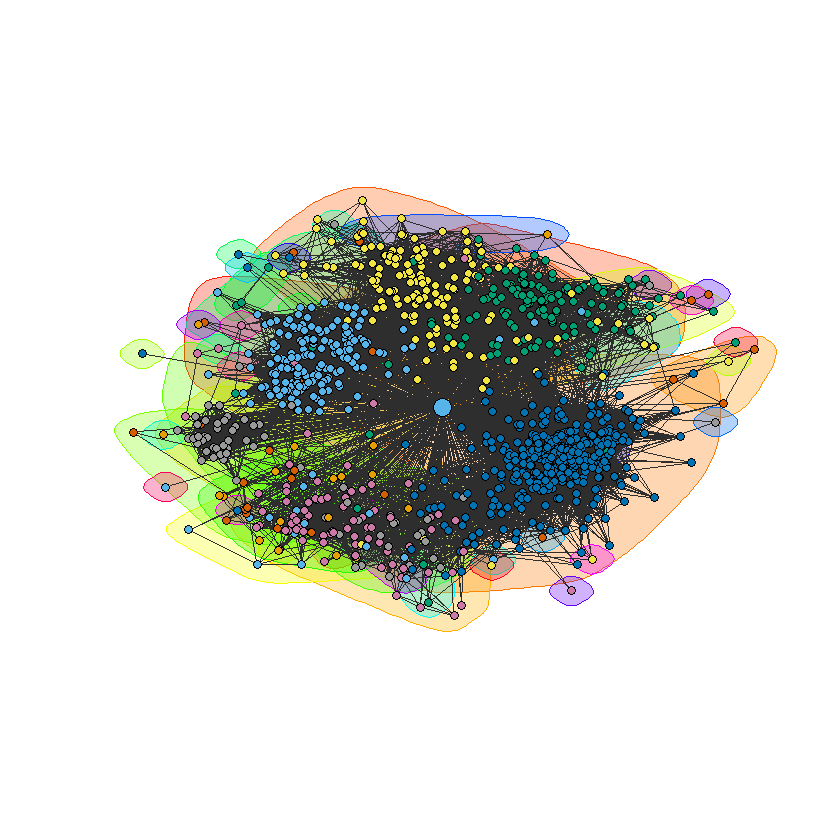

The number of structures in the graph is 10
The modularity of the community structure is 0.489095180244803


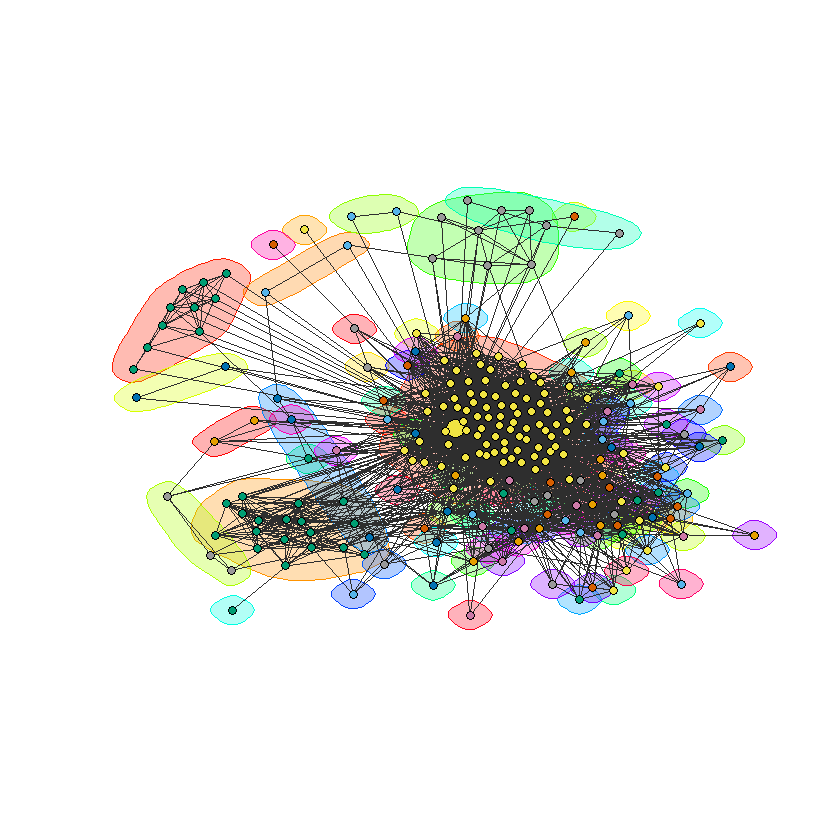

The number of structures in the graph is 9
The modularity of the community structure is 0.027623772388464


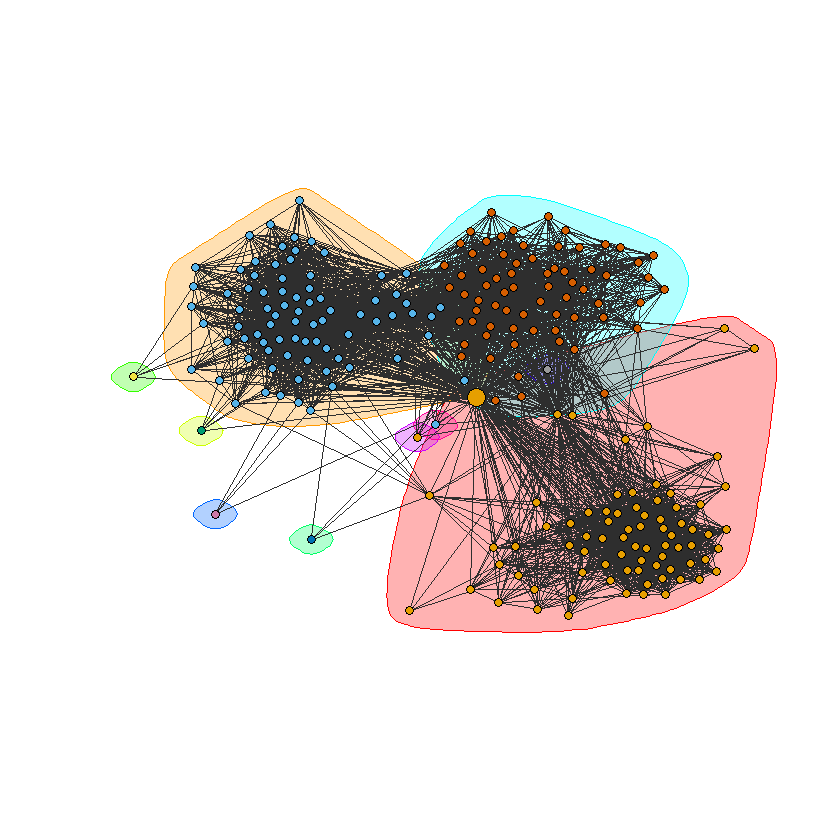

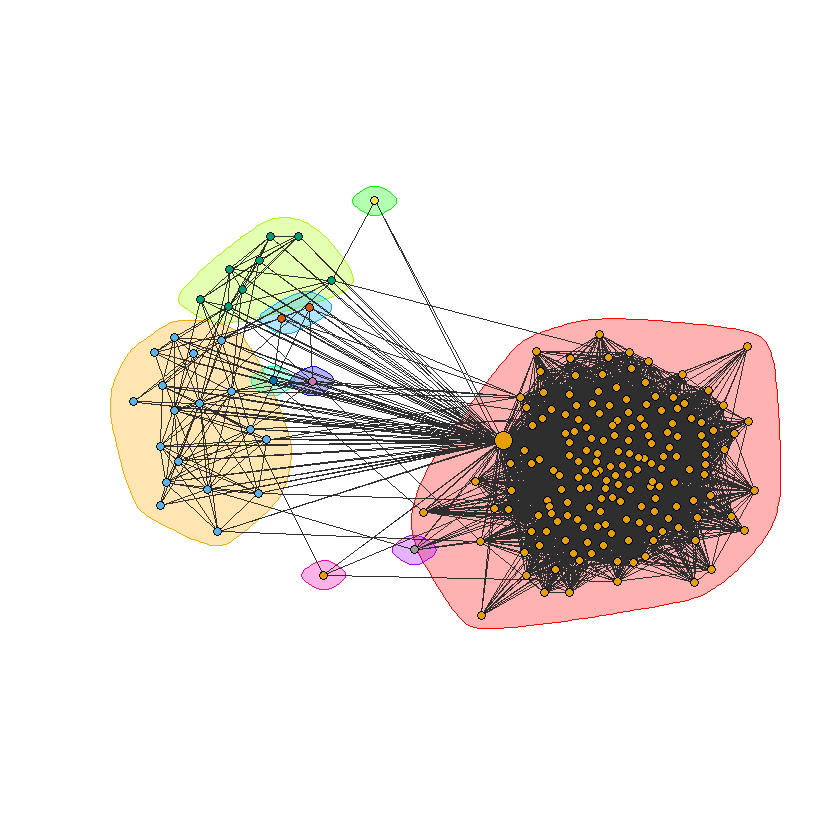

In [96]:
#Question 9 (edge_betweenness)
core_community('edge_betweenness')

The number of structures in the graph is 26
The modularity of the community structure is 0.44185326886839
The number of structures in the graph is 22
The modularity of the community structure is 0.458127093719977


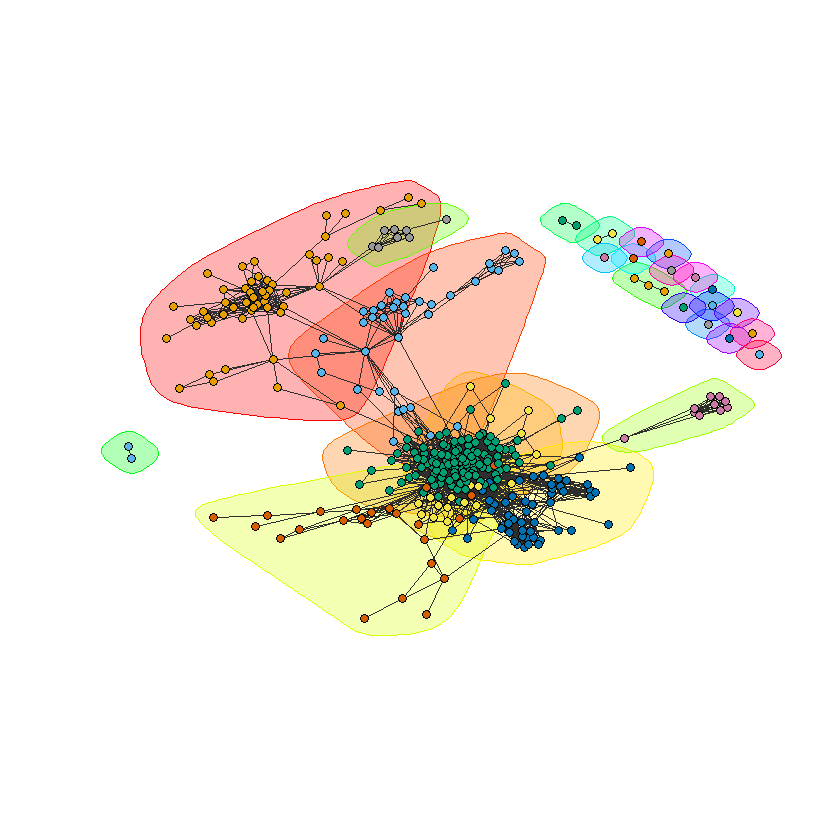

The number of structures in the graph is 8
The modularity of the community structure is 0.245691795942674


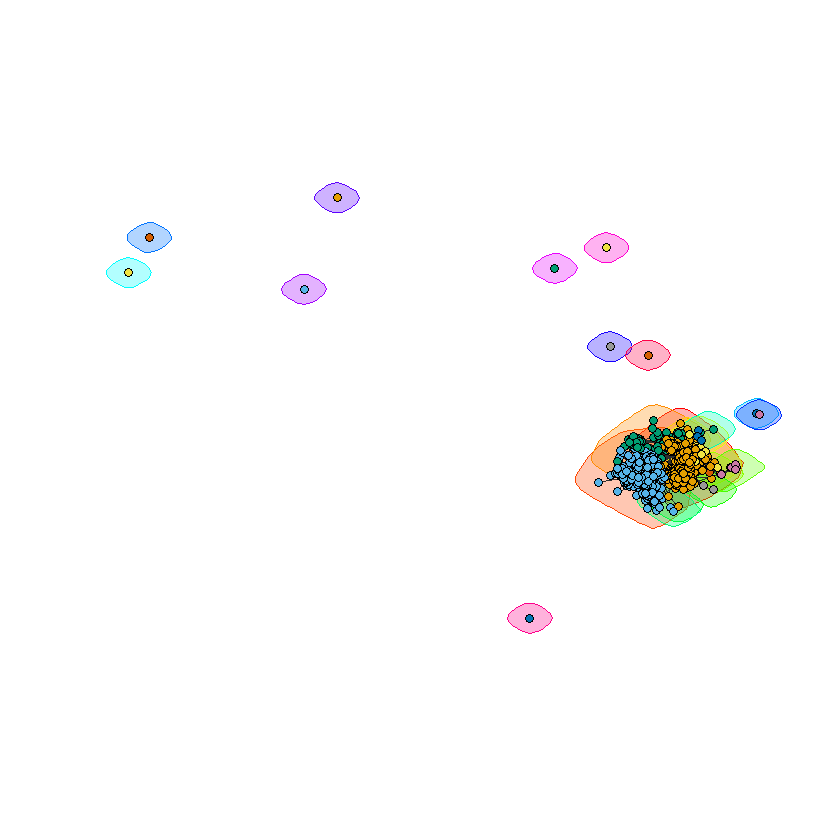

The number of structures in the graph is 3
The modularity of the community structure is 0.534214154606172


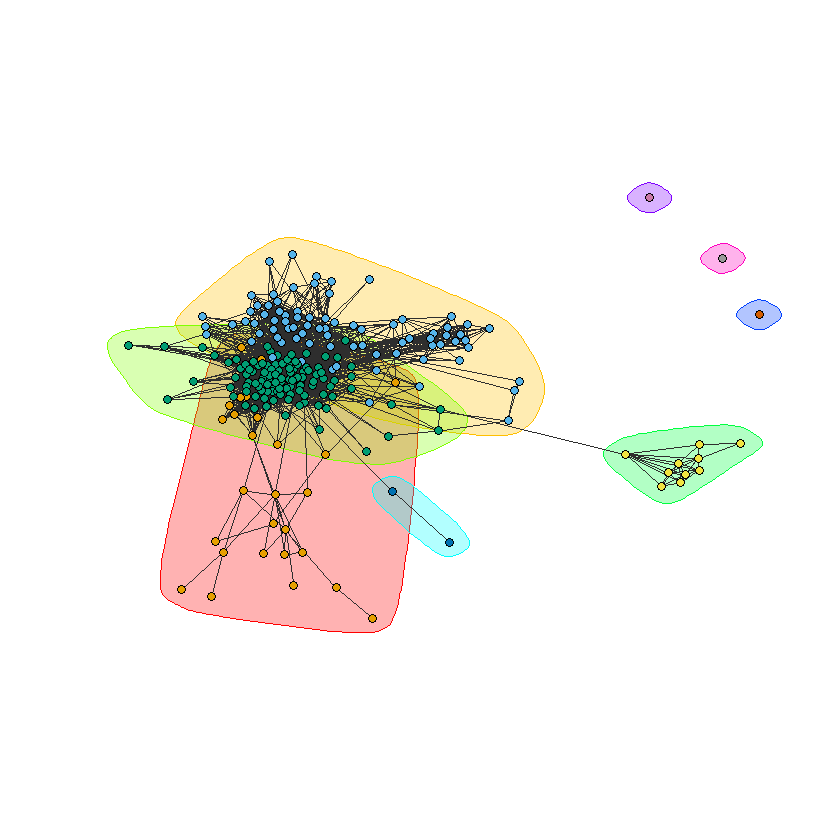

The number of structures in the graph is 2
The modularity of the community structure is 0.148195631953499


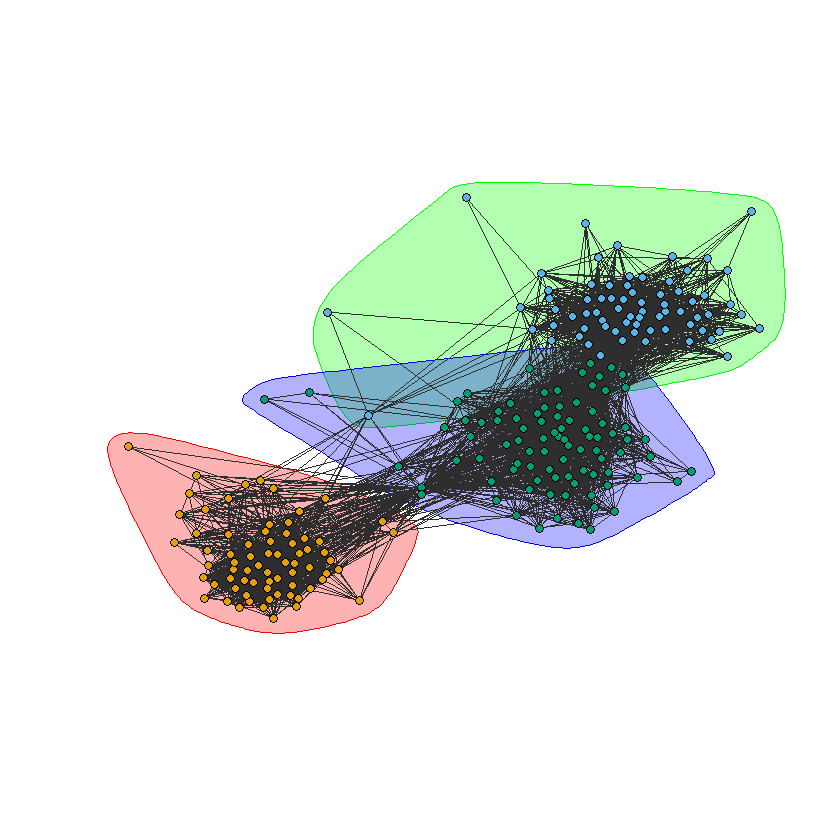

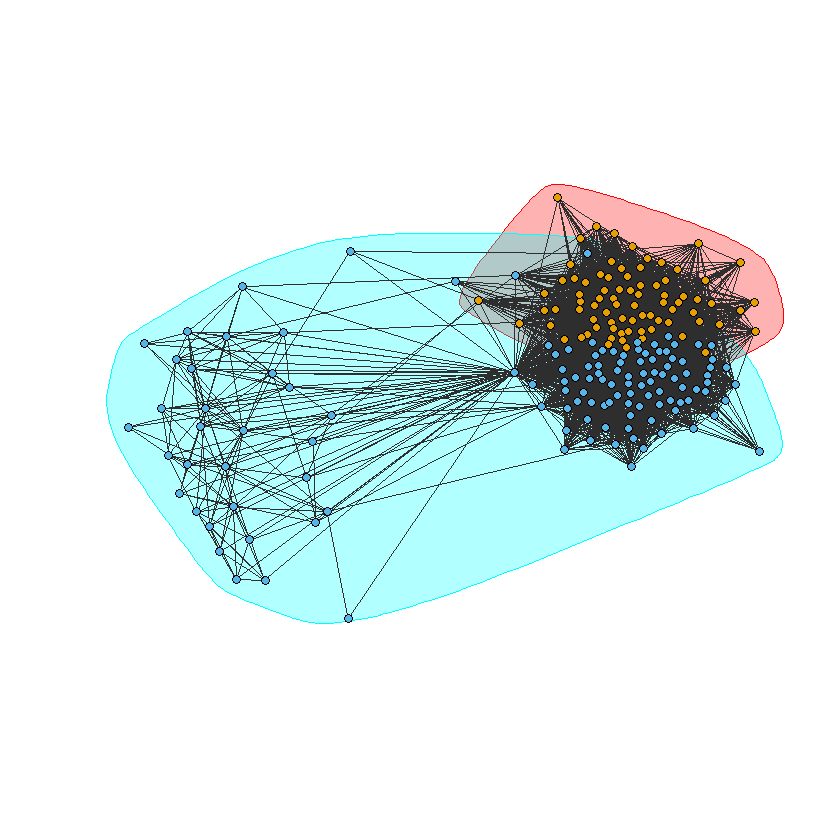

In [100]:
#Question 10 (fast_greedy)
core_community('fast_greedy',remove_core=T)

The number of structures in the graph is 50
The modularity of the community structure is 0.41614614203983
The number of structures in the graph is 57
The modularity of the community structure is 0.521321576382217


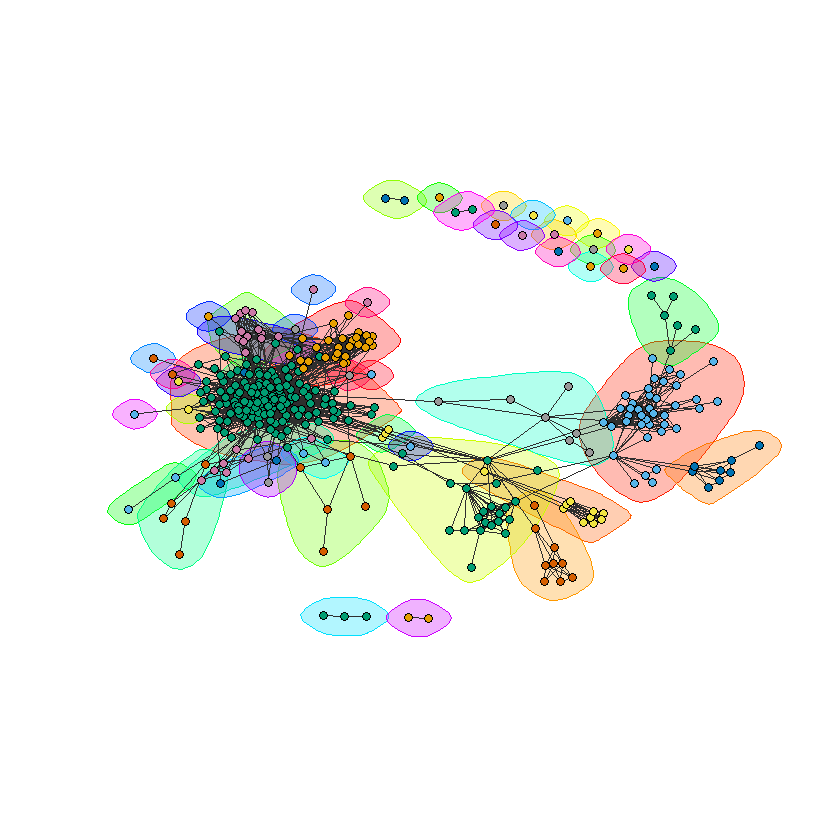

The number of structures in the graph is 103
The modularity of the community structure is 0.150566340187559


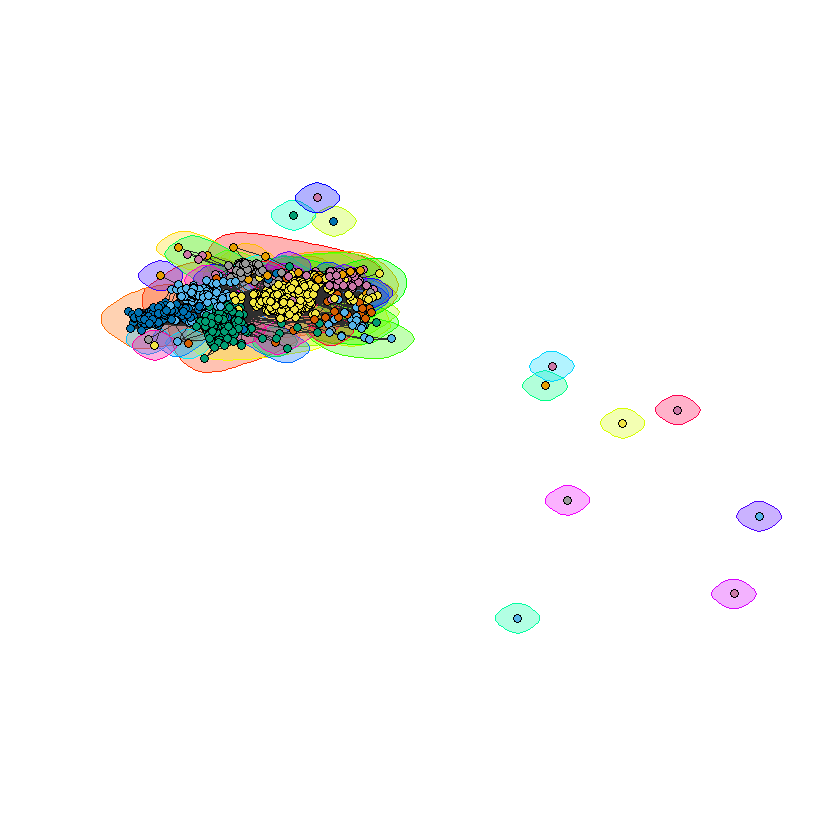

The number of structures in the graph is 11
The modularity of the community structure is 0.515441277123504


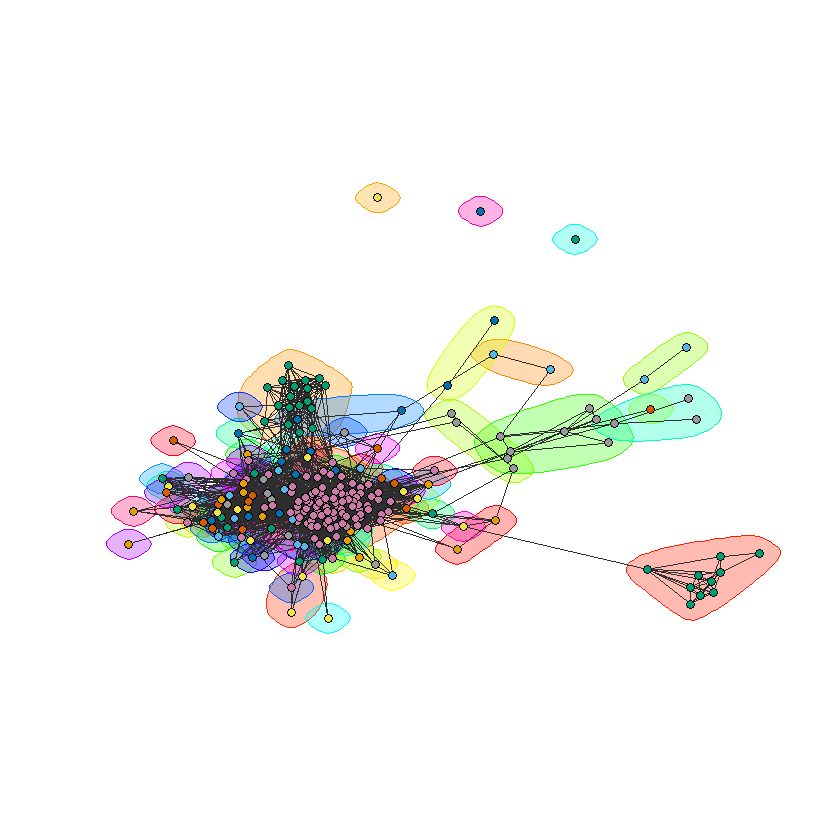

The number of structures in the graph is 4
The modularity of the community structure is 0.0324952980499142


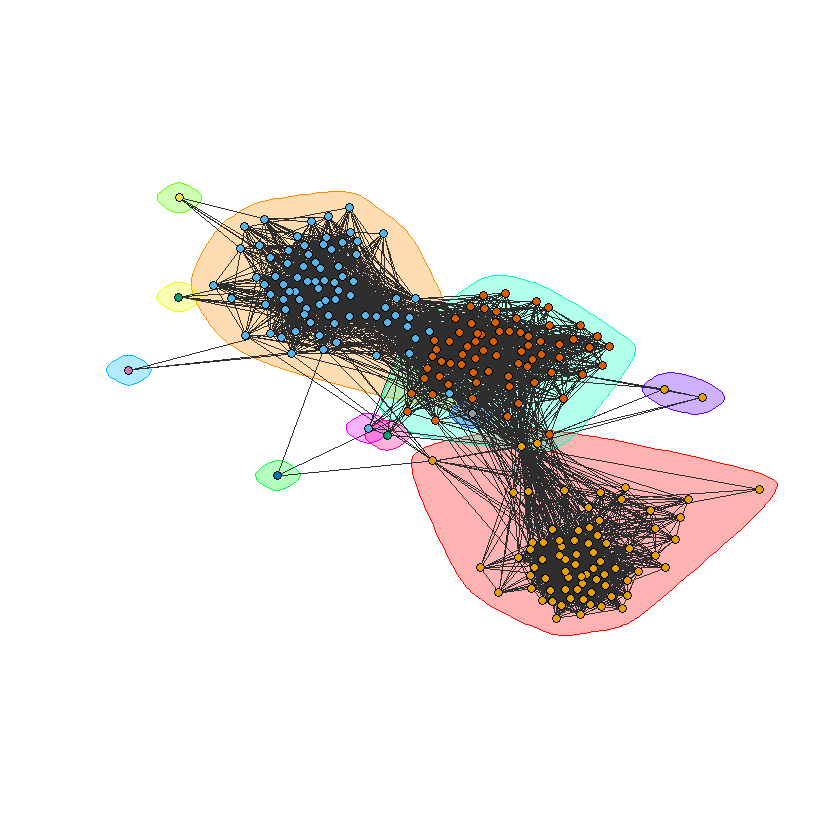

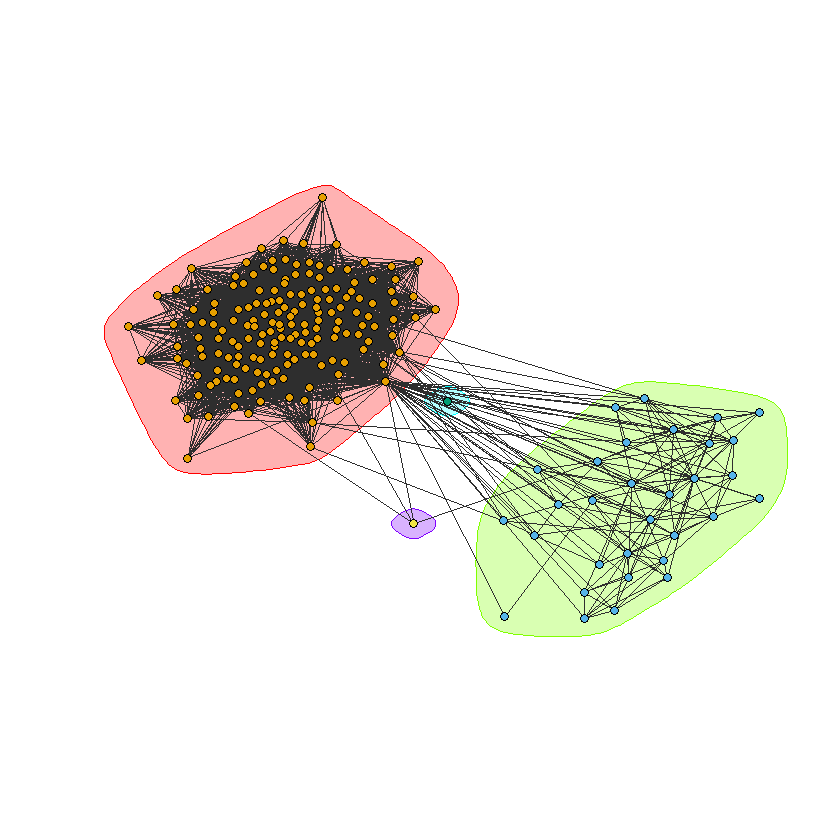

In [101]:
#Question 10 (edge_betweenness)
core_community('edge_betweenness',remove_core=T)

The number of structures in the graph is 40
The modularity of the community structure is 0.418007659453891
The number of structures in the graph is 39
The modularity of the community structure is 0.520960829417416


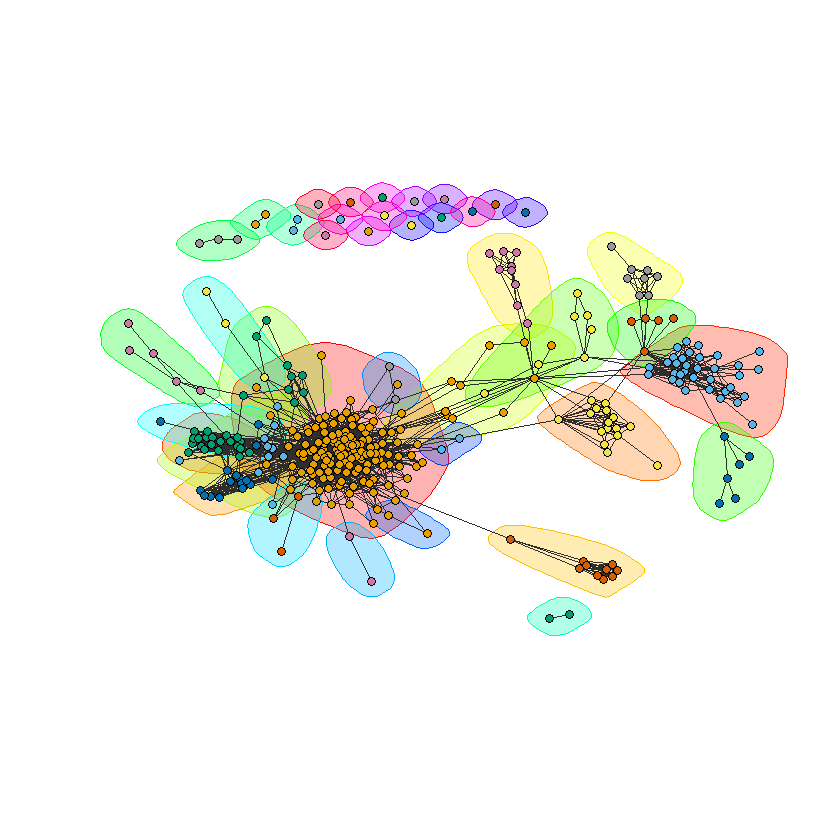

The number of structures in the graph is 15
The modularity of the community structure is 0.244815615942085


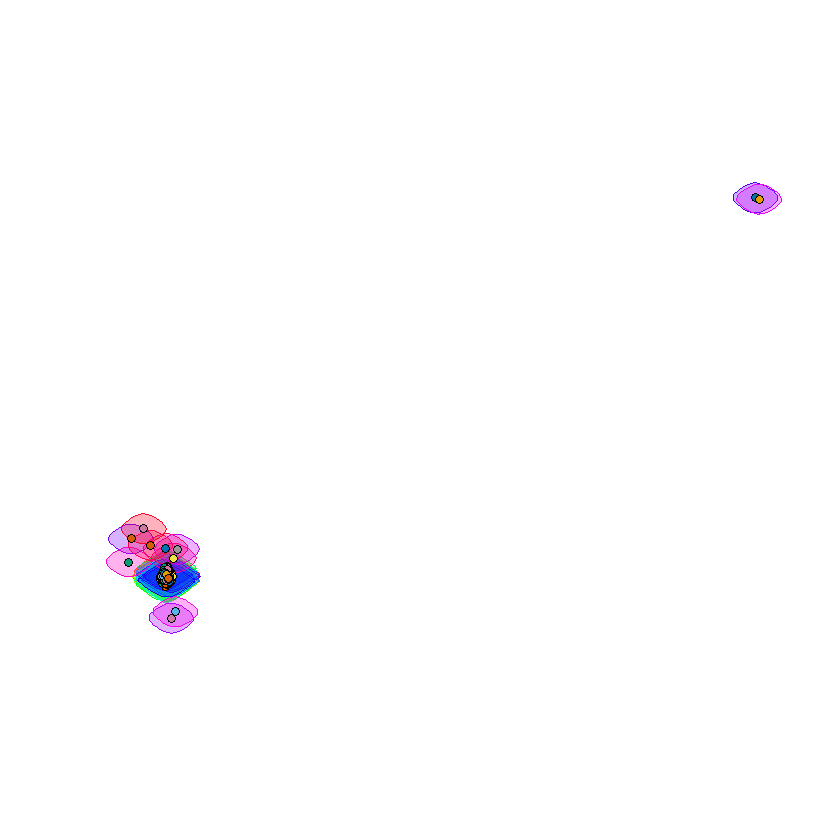

The number of structures in the graph is 4
The modularity of the community structure is 0.543443679279522


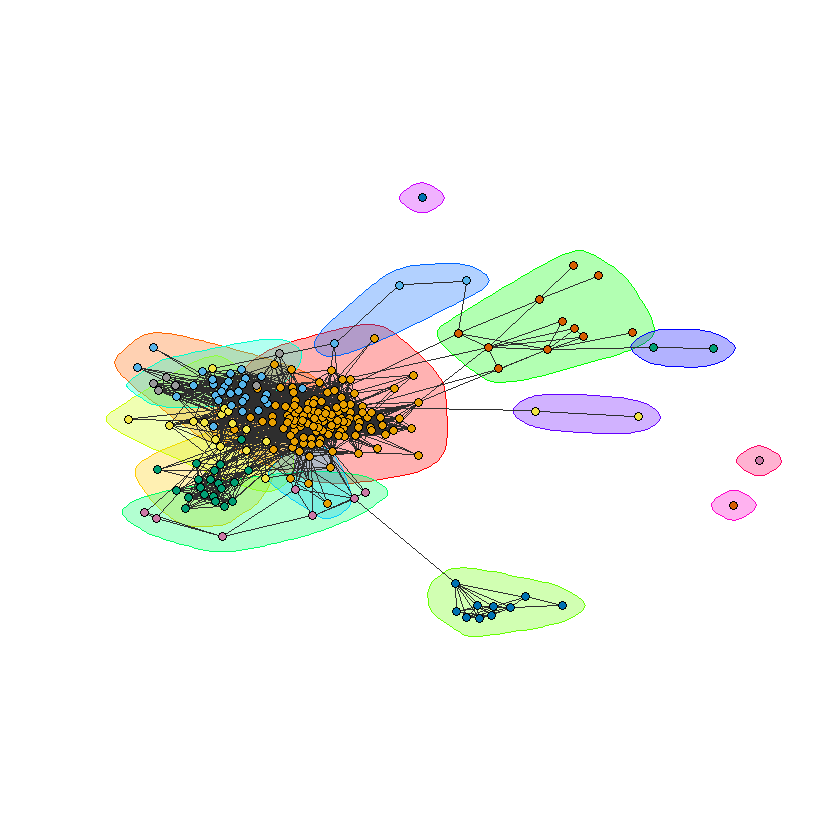

The number of structures in the graph is 5
The modularity of the community structure is 0.0273715944871148


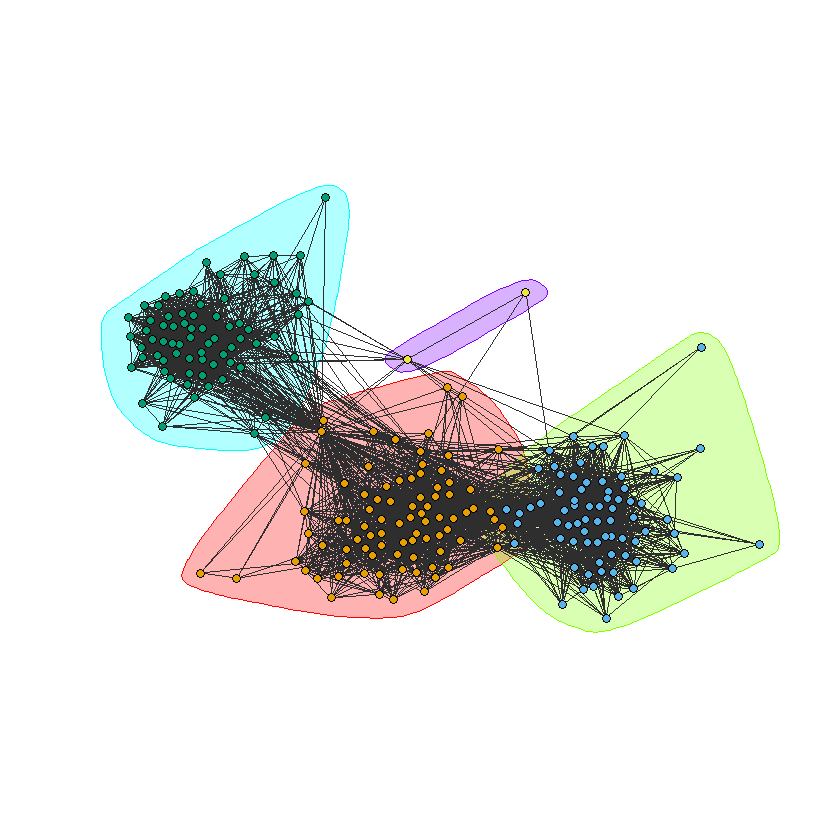

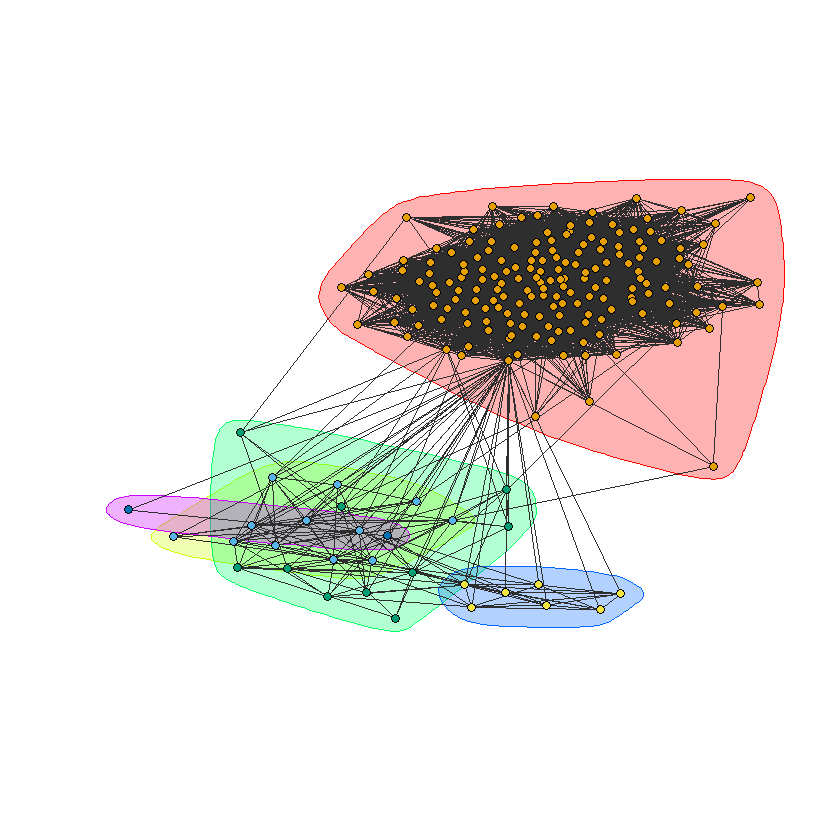

In [4]:
#Question 10 (infomap)
core_community('infomap',remove_core=T)

In [40]:
mutual_friend <- function(net, i, j){
    neighbor_i = unlist(neighbors(net,i))
    neighbor_j = unlist(neighbors(net,j))
    return(intersect(neighbor_i,neighbor_j))
}
embeddedness <- function(net,i,j){
    return(length(mutual_friend(net,i,j)))
}

In [7]:
dispersion <- function(net,i,j){
    mutual_friends <- unlist(mutual_friend(net,i,j))
    #print(mutual_friends)
    #mf = V(net)[V(net)$name %in% mutual_friends]
    net <- delete.vertices(net,c(which(V(net)$name==i),which(V(net)$name==j)))
    #final_net = induced_subgraph(net, vids = mutual_friends)
    #return(sum(distances(final_net))/2)
    distance <- 0
    if (length(mutual_friends)>1){
        combos = combn(mutual_friends, 2)
        for (i in 1:(length(combos)/2)) {
            friend1 = combos[,i][1]
            friend2 = combos[,i][2]
            dist = distances(net,v=which(V(net)$name==friend1),to=which(V(net)$name==friend2))[1]
            distance = distance + dist
        }
    }
    return(distance)
}

# Embeddedness plots

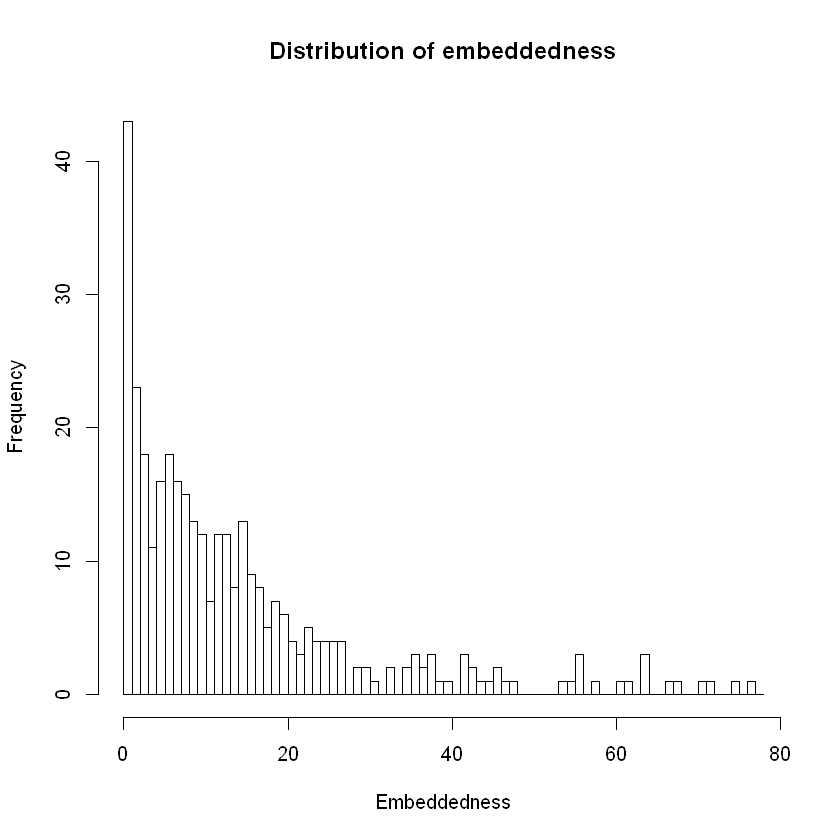

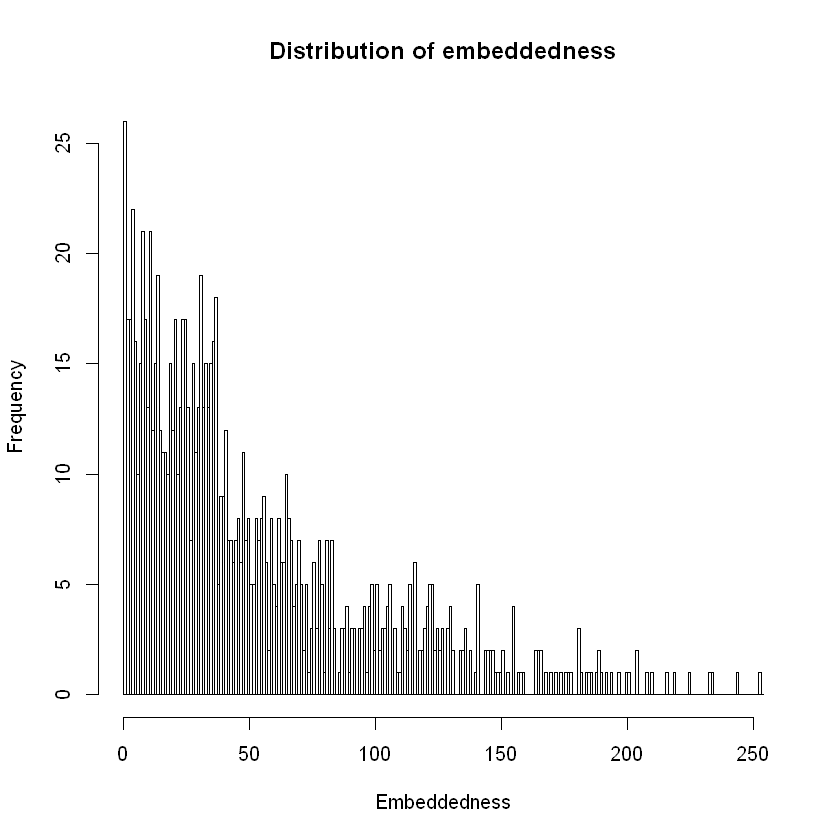

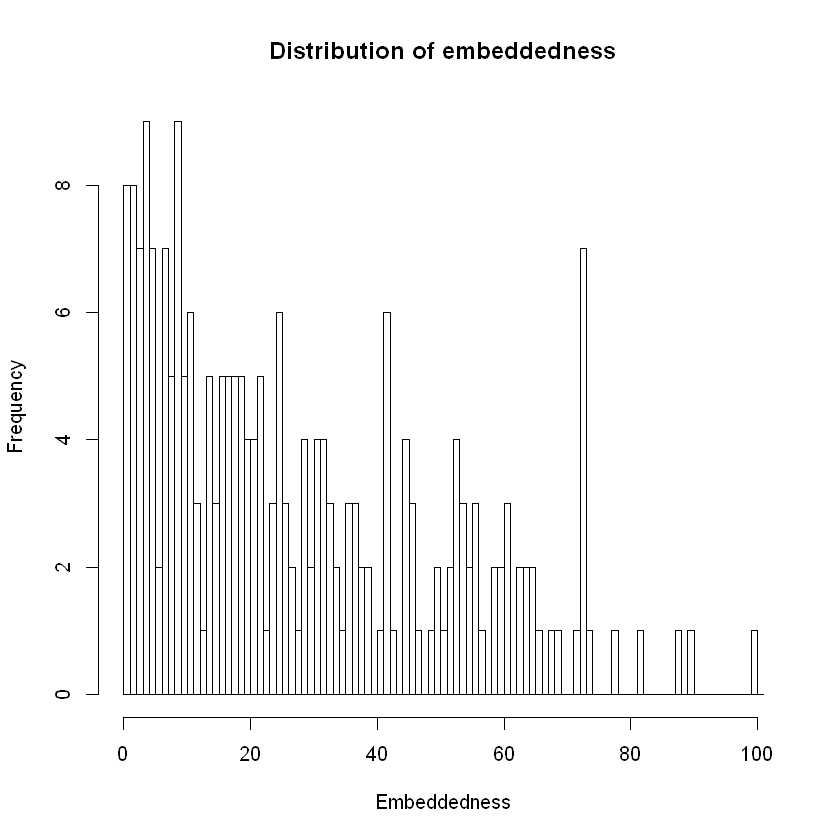

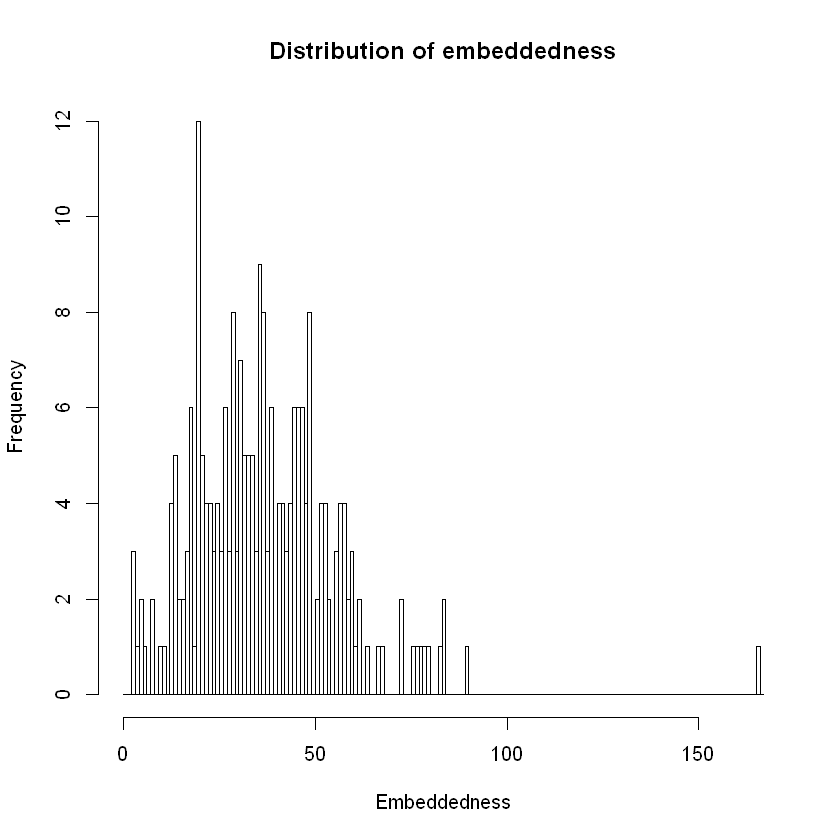

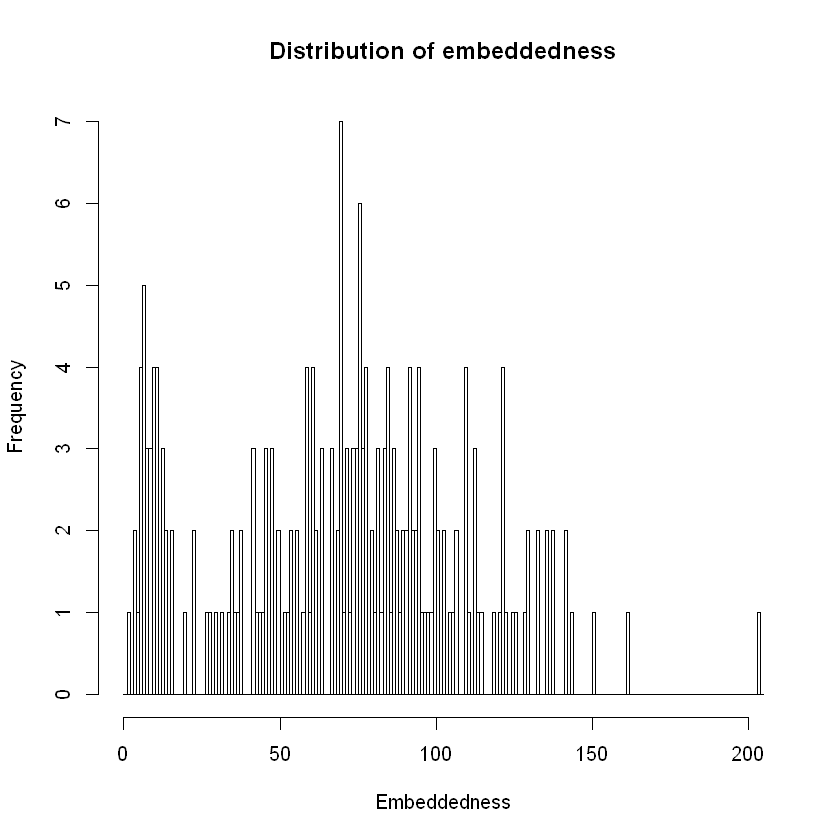

In [42]:
core_list = c(1,108,349,484,1087)
for (core_node in core_list){
    neighbors = unlist(ego(graph, order=1, nodes = core_node, mode = "all"))
    personal_net = induced_subgraph(graph, vids = as.character(neighbors))
    embed_list <- c()
    cn = V(personal_net)[V(personal_net)$name==core_node]
    for (i in neighbors){
        neighbor = V(personal_net)[V(personal_net)$name==i]
        if(neighbor!=cn){
            embed_list <- c(embed_list,embeddedness(personal_net,cn,neighbor))
        }
    }
    hist(embed_list, breaks = seq(from = 0, to = max(embed_list) + 1, by = 1),
         main = 'Distribution of embeddedness', xlab = "Embeddedness")
}

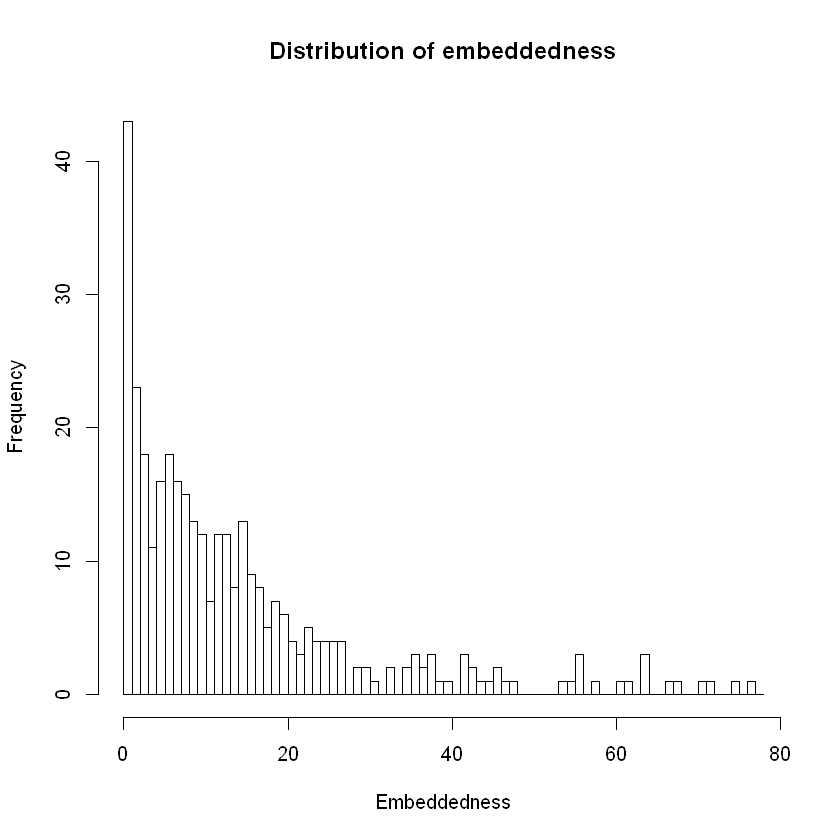

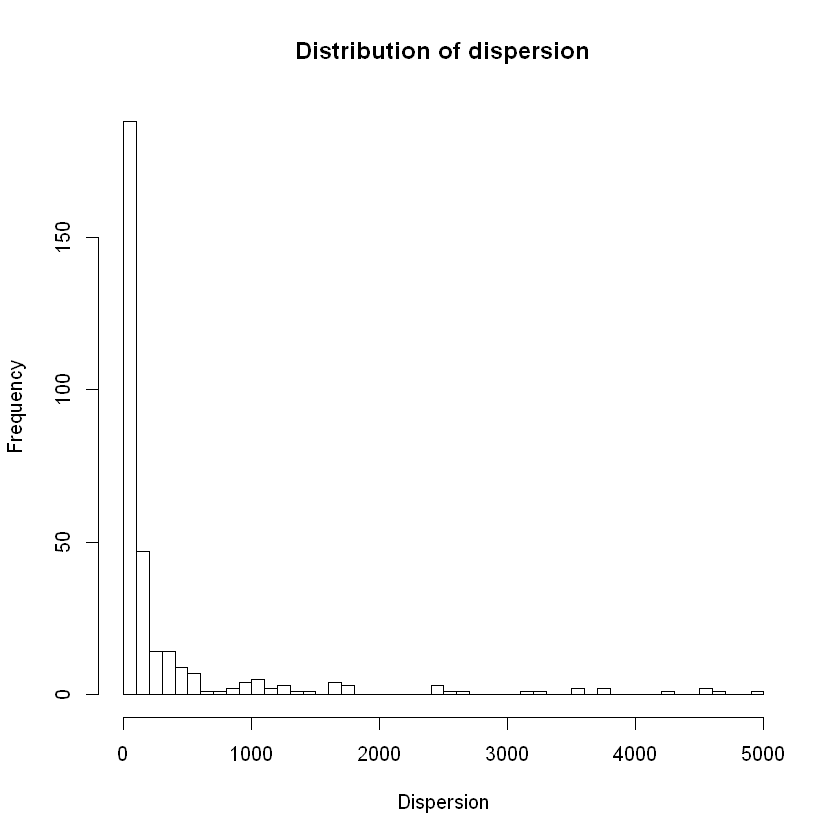

In [9]:
#core_list = c(1,108,349,484,1087)
core_list = c(1)
for (core_node in core_list){
    neighbors = unlist(ego(graph, order=1, nodes = core_node, mode = "all"))
    personal_net = induced_subgraph(graph, vids = as.character(neighbors))
    embed_list <- c()
    dispersion_list <- c()
    cn = V(personal_net)[V(personal_net)$name==core_node]
    for (i in neighbors){
        neighbor = V(personal_net)[V(personal_net)$name==i]
        if(neighbor!=cn){
            embed_list <- c(embed_list,embeddedness(personal_net,cn,neighbor))
            dispersion_list <- c(dispersion_list,dispersion(personal_net,cn,neighbor))
        }
    }
    hist(embed_list, breaks = seq(from = 0, to = max(embed_list) + 1, by = 1),
         main = 'Distribution of embeddedness', xlab = "Embeddedness")
    hist(dispersion_list, breaks=50,
         main = 'Distribution of dispersion', xlab = "Dispersion")
}

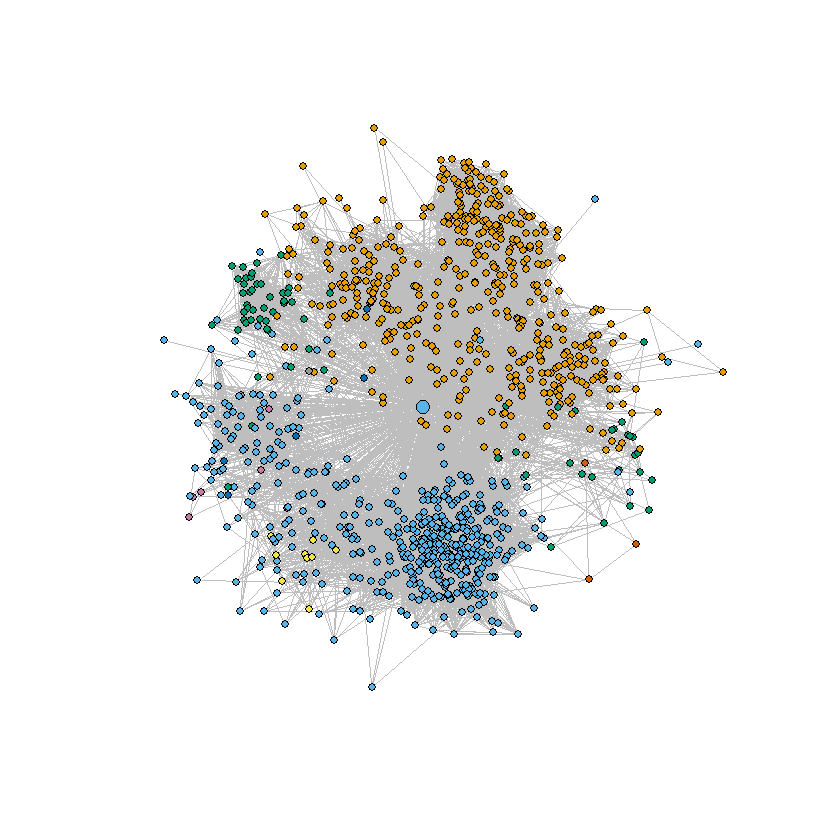

In [40]:
#core_list = c(1,108,349,484,1087)
core_list = c(108)
for (core_node in core_list){
    neighbors = unlist(ego(graph, order=1, nodes = core_node, mode = "all"))
    personal_net = induced_subgraph(graph, vids = as.character(neighbors))
    dispersion_list <- c()
    cn = V(personal_net)[V(personal_net)$name==core_node]
    for (i in neighbors){
        neighbor = V(personal_net)[V(personal_net)$name==i]
        if(neighbor!=cn){
            dispersion_list <- c(dispersion_list,dispersion(personal_net,cn,neighbor))
        }
    }
    dispersion_list[mapply(is.infinite, dispersion_list)] = 0
    max_disp = max(dispersion_list)
    max_disp_node = V(personal_net)$name[which(dispersion_list == max(dispersion_list))]
    comm = cluster_fast_greedy(personal_net)
    vertex_size = (V(personal_net)$name==core_node)*2+3
    vertex_size[which(V(personal_net)$name==max_disp_node)] = 7
    vertex_color = comm$membership
    vertex_color[which(V(personal_net)$name==max_disp_node)]='red'
    edge_color = rep("grey", length(E(personal_net)))
    edge_color[which(get.edgelist(personal_net)[,1] == max_disp_node|get.edgelist(personal_net)[,2] == max_disp_node)] = "red"
    edge_width = rep(0.5, length(E(personal_net)))
    edge_width[which(get.edgelist(personal_net)[,1] == max_disp_node|get.edgelist(personal_net)[,2] == max_disp_node)] = 5
    plot(personal_net,vertex.label=NA,vertex.size=vertex_size,vertex.color=vertex_color,edge.color = edge_color, 
         edge.width=edge_width, layout = layout.fruchterman.reingold)
}

In [ ]:
#core_list = c(1,108,349,484,1087)
core_list = c(108)
for (core_node in core_list){
    neighbors = unlist(ego(graph, order=1, nodes = core_node, mode = "all"))
    personal_net = induced_subgraph(graph, vids = as.character(neighbors))
    dispersion_list <- c()
    embed_list <- c()
    cn = V(personal_net)[V(personal_net)$name==core_node]
    for (i in neighbors){
        neighbor = V(personal_net)[V(personal_net)$name==i]
        if(neighbor!=cn){
            embed_list <- c(embed_list,embeddedness(personal_net,cn,neighbor))
            dispersion_list <- c(dispersion_list,dispersion(personal_net,cn,neighbor))
        }
    }
    dispersion_list[mapply(is.infinite, dispersion_list)] = 0
    de = dispersion_list / embed_list
    de[mapply(is.nan, de)] = 0
    max_de_node = V(personal_net)$name[which(de == max(de))]
    max_de = max(de)
    comm = cluster_fast_greedy(personal_net)
    vertex_size = (V(personal_net)$name==core_node)*2+3
    vertex_size[which(V(personal_net)$name==max_de_node)] = 7
    vertex_color = comm$membership
    vertex_color[which(V(personal_net)$name==max_de_node)]='red'
    edge_color = rep("grey", length(E(personal_net)))
    edge_color[which(get.edgelist(personal_net)[,1] == max_de_node | get.edgelist(personal_net)[,2] == max_de_node)] = "red"
    edge_width = rep(0.5, length(E(personal_net)))
    edge_width[which(get.edgelist(personal_net)[,1] == max_de_node|get.edgelist(personal_net)[,2] == max_de_node)] = 5
    plot(personal_net,vertex.label=NA,vertex.size=vertex_size,vertex.color=vertex_color,edge.color = edge_color, 
         edge.width=edge_width, layout = layout.fruchterman.reingold)
}

# Question 16

In [9]:
neighbors = unlist(ego(graph, order=1, nodes = which(V(graph)$name==415), mode = "all"))
personal_net = induced_subgraph(graph, vids = as.character(neighbors))
target = V(personal_net)$name[degree(personal_net)==24]
print(target)
writeLines(paste('The number of users in the list is', length(target)))

 [1] 497 579 601 616 619 628 644 659 660 662 663
The number of users in the list is 11


[1] "Mutual friends 3 1"
+ 1045/1046 vertices, named, from fd859ed:
   [1] 1    59   172  349  354  364  367  377  390  415  421  429  476  484 
  [15] 485  518  527  539  564  567  581  597  602  607  630  638  642  650 
  [29] 652  897  898  899  900  901  902  903  904  905  906  907  908  909 
  [43] 910  911  912  913  914  915  916  917  918  919  920  921  922  923 
  [57] 924  925  926  927  928  929  930  931  932  933  934  935  936  937 
  [71] 938  939  940  941  942  943  944  945  946  947  948  949  950  951 
  [85] 952  953  954  955  956  957  958  959  960  961  962  963  964  965 
  [99] 966  967  968  969  970  971  972  973  974  975  976  977  978  979 
 [113] 980  981  982  983  984  985  986  987  988  989  990  991  992  993 
 [127] 994  995  996  997  998  999  1000 1001 1002 1003 1004 1005 1006 1007
+ ... omitted several vertices
+ 3/1046 vertices, named, from fd859ed:
[1] 59  108 172
[1] "Mutual friends 3 2"
+ 1045/1046 vertices, named, from fd859ed:
   [1] 

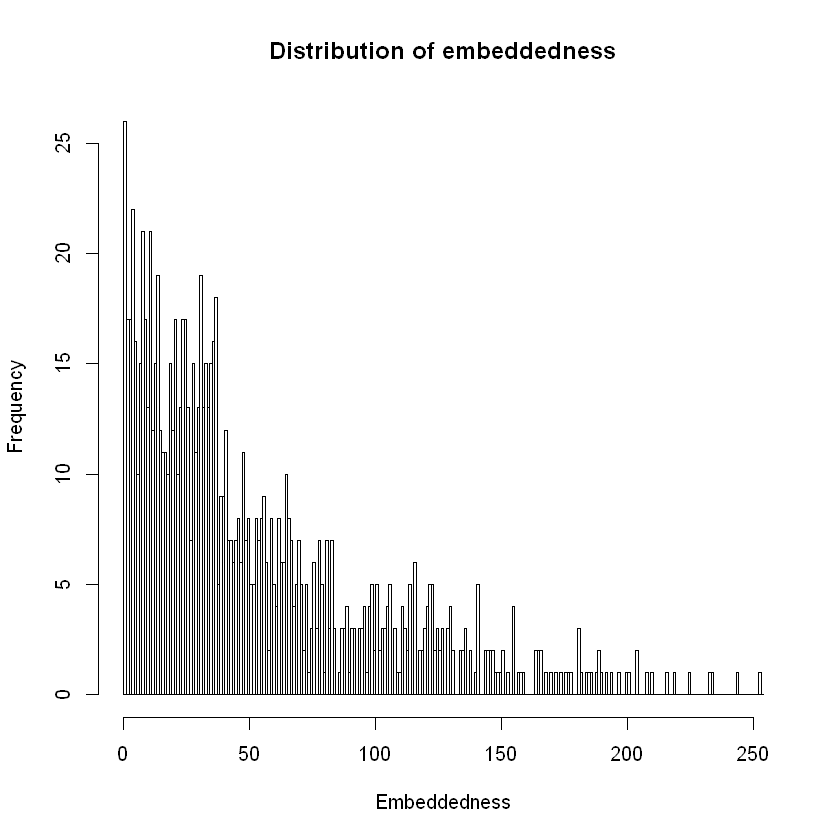